In [0]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# reading data with pandas
# data = pd.read_csv('employee.csv')
data = spark.sql('SELECT * FROM employee')
data = data.toPandas()

In [0]:
# checking head of data
data.head()

Out[3]:

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157.0,3,0,0,None,low,1
1,0.80,0.86,5,262.0,6,0,0,sales,None,1
2,0.11,0.88,7,272.0,4,0,0,sales,None,1
3,0.72,NaN,5,NaN,5,0,0,sales,low,1
4,0.37,0.52,2,159.0,3,0,0,sales,low,1


In [0]:
# check shape of data
data.shape

Out[4]: (14999, 10)

In [0]:
# when spark df converted into pandas. categorical null values replaced with None
data = data.fillna(np.nan)
data.head()

Out[5]:

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157.0,3,0,0,NaN,low,1
1,0.80,0.86,5,262.0,6,0,0,sales,NaN,1
2,0.11,0.88,7,272.0,4,0,0,sales,NaN,1
3,0.72,NaN,5,NaN,5,0,0,sales,low,1
4,0.37,0.52,2,159.0,3,0,0,sales,low,1


# 👉 Exploratory Data Analysis (EDA)

### Check Data Types

Return the dtypes in the DataFrame.

This returns a Series with the data type of each column. The result’s index is the original DataFrame’s columns. Columns with mixed types are stored with the object dtype. See the User Guide for more.

In [0]:
data.dtypes

Out[6]: satisfaction_level float64
last_evaluation float64
number_project int32
average_montly_hours float64
time_spend_company int32
Work_accident int32
promotion_last_5years int32
department object
salary object
left int32
dtype: object

### Check Info
Print a concise summary of a DataFrame.

This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 satisfaction_level 14999 non-null float64
 1 last_evaluation 14998 non-null float64
 2 number_project 14999 non-null int32 
 3 average_montly_hours 14998 non-null float64
 4 time_spend_company 14999 non-null int32 
 5 Work_accident 14999 non-null int32 
 6 promotion_last_5years 14999 non-null int32 
 7 department 14998 non-null object 
 8 salary 14997 non-null object 
 9 left 14999 non-null int32 
dtypes: float64(3), int32(5), object(2)
memory usage: 879.0+ KB

### Check Missing Values
Detect missing values for an array-like object.

This function takes a scalar or array-like object and indicates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).

In [0]:
# check missing values
data.isnull().sum()

Out[8]: satisfaction_level 0
last_evaluation 1
number_project 0
average_montly_hours 1
time_spend_company 0
Work_accident 0
promotion_last_5years 0
department 1
salary 2
left 0
dtype: int64

### Summary Statistics
Generate descriptive statistics.

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [0]:
# summary statistics
data.describe().transpose()

Out[9]:

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14998.0,0.716091,0.171170,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14998.0,201.048873,49.944443,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0


### Pivot Table
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.

In [0]:
data.pivot_table(index='left')

Out[10]:

,Work_accident,average_montly_hours,last_evaluation,number_project,promotion_last_5years,satisfaction_level,time_spend_company
left,,,,,,,
0,0.175009,199.060203,0.715473,3.786664,0.026251,0.666810,3.380032
1,0.047326,207.414846,0.718070,3.855503,0.005321,0.440098,3.876505


### Target Value Counts
Return a Series containing counts of unique values.

The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

In [0]:
# check target balance
data['left'].value_counts(normalize=True)

Out[11]: 0 0.761917
1 0.238083
Name: left, dtype: float64

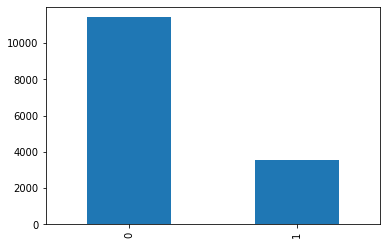

In [0]:
# bar plot
data['left'].value_counts().plot.bar();

### Analyze Target Variable on Features

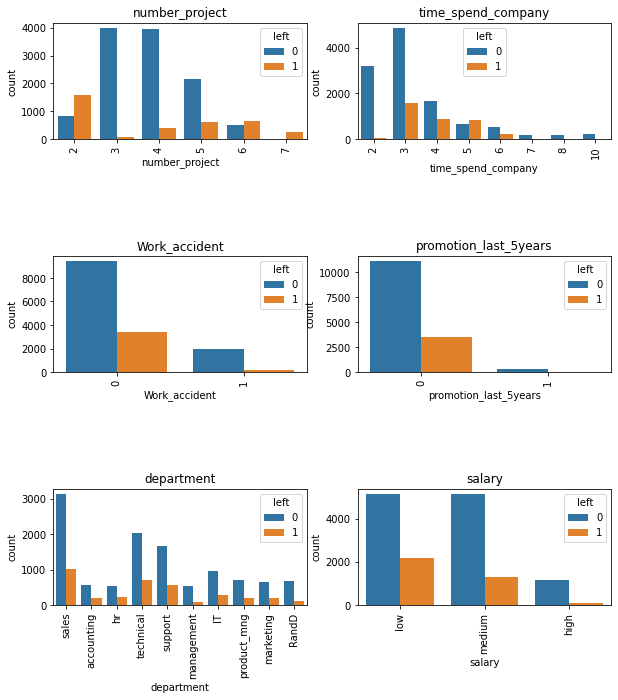

In [0]:
features = ['number_project','time_spend_company','Work_accident','promotion_last_5years','department','salary']

fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title(j)

# 👉 Data Preparation

### Train Test Split

In [0]:
X = data.drop(['left'], axis=1)
y = data['left']

In [0]:
# check X variable
X.head()

Out[15]:

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3,0,0,NaN,low
1,0.80,0.86,5,262.0,6,0,0,sales,NaN
2,0.11,0.88,7,272.0,4,0,0,sales,NaN
3,0.72,NaN,5,NaN,5,0,0,sales,low
4,0.37,0.52,2,159.0,3,0,0,sales,low


In [0]:
# check y variable
y.head()

Out[16]: 0 1
1 1
2 1
3 1
4 1
Name: left, dtype: int32

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [0]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

Out[18]: ((10499, 9), (10499,), (4500, 9), (4500,))

# Data Processing Pipeline

In [0]:
# numeric features
numeric_features = X_train.select_dtypes(include='number').columns.tolist()
print(numeric_features)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']

In [0]:
# categorical features
categorical_features = X_train.select_dtypes(exclude='number').columns.tolist()
print(categorical_features)

['department', 'salary']

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [0]:
# build pipeline for numeric features
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())])

In [0]:
# build pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('cat-impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [0]:
# fit numeric pipeline
numeric_pipeline.fit_transform(X_train.select_dtypes(include='number'))

Out[24]: array([[0.73626374, 0.171875 , 0.2 , ..., 0. , 0. ,
 0. ],
 [0.40659341, 0.21875 , 0. , ..., 0.125 , 0. ,
 0. ],
 [0.2967033 , 0.890625 , 0.2 , ..., 0.375 , 0. ,
 0. ],
 ...,
 [0.7032967 , 0.921875 , 0.4 , ..., 0.5 , 0. ,
 0. ],
 [0.86813187, 0.234375 , 0.2 , ..., 0.625 , 0. ,
 0. ],
 [0.58241758, 0.859375 , 0.2 , ..., 0.125 , 0. ,
 0. ]])

In [0]:
# fit categorical pipeline 
categorical_pipeline.fit_transform(X_train.select_dtypes(include='object'))

Out[25]: array([[0., 0., 0., ..., 0., 0., 1.],
 [1., 0., 0., ..., 0., 1., 0.],
 [0., 0., 0., ..., 0., 1., 0.],
 ...,
 [0., 0., 0., ..., 0., 1., 0.],
 [0., 0., 0., ..., 0., 0., 1.],
 [0., 1., 0., ..., 0., 0., 1.]])

In [0]:
from sklearn.compose import ColumnTransformer

data_pipeline = ColumnTransformer(transformers=[
    ('numeric', numeric_pipeline, numeric_features),
    ('categorical', categorical_pipeline, categorical_features)
])

In [0]:
# fit entire data pipeline
data_pipeline.fit_transform(X_train)

Out[27]: array([[0.73626374, 0.171875 , 0.2 , ..., 0. , 0. ,
 1. ],
 [0.40659341, 0.21875 , 0. , ..., 0. , 1. ,
 0. ],
 [0.2967033 , 0.890625 , 0.2 , ..., 0. , 1. ,
 0. ],
 ...,
 [0.7032967 , 0.921875 , 0.4 , ..., 0. , 1. ,
 0. ],
 [0.86813187, 0.234375 , 0.2 , ..., 0. , 0. ,
 1. ],
 [0.58241758, 0.859375 , 0.2 , ..., 0. , 0. ,
 1. ]])

In [0]:
# we can now use data_pipeline to transform X_train and X_test
X_train_transformed = data_pipeline.transform(X_train)
X_test_transformed = data_pipeline.transform(X_test)

In [0]:
X_train_transformed.shape, X_test_transformed.shape

Out[29]: ((10499, 20), (4500, 20))

# Model Training: Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lr = LogisticRegression()

In [0]:
# fit the model
lr.fit(X_train_transformed, y_train)

Out[32]: LogisticRegression()

In [0]:
# predict labels on X_test
y_pred = lr.predict(X_test_transformed)
y_pred

Out[33]: array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
# predict probability on X_test
y_pred_proba = lr.predict_proba(X_test_transformed)
y_pred_proba

Out[34]: array([[0.947415 , 0.052585 ],
 [0.94918898, 0.05081102],
 [0.94243387, 0.05756613],
 ...,
 [0.83949115, 0.16050885],
 [0.85369042, 0.14630958],
 [0.52435228, 0.47564772]])

# Model Evaluation: Logistic Regression

In [0]:
# accuracy on test set
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

Out[35]: 0.7902222222222223

In [0]:
# AUC on test set
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba[:,1])

Out[36]: 0.819135897773127

In [0]:
# recall on test set
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

Out[37]: 0.33053221288515405

In [0]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3202 227]
 [ 717 354]]

In [0]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

precision recall f1-score support

 0 0.82 0.93 0.87 3429
 1 0.61 0.33 0.43 1071

 accuracy 0.79 4500
 macro avg 0.71 0.63 0.65 4500
weighted avg 0.77 0.79 0.77 4500

Out[40]:

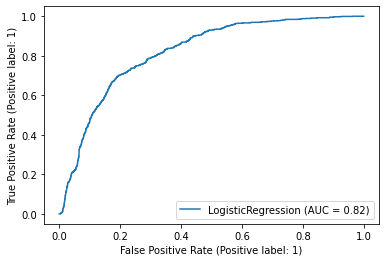

<sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x7f673f641c40>

In [0]:
# AUC plot
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_test_transformed, y_test)

# Model Training: Support Vector Machine

In [0]:
from sklearn.svm import SVC

In [0]:
svm = SVC(probability=True)

In [0]:
# fit the model
svm.fit(X_train_transformed, y_train)

Out[43]: SVC(probability=True)

In [0]:
# predict labels on X_test
y_pred = svm.predict(X_test_transformed)
y_pred

Out[44]: array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
# predict probability on X_test
y_pred_proba = svm.predict_proba(X_test_transformed)
y_pred_proba

Out[45]: array([[0.98643977, 0.01356023],
 [0.98912419, 0.01087581],
 [0.99740193, 0.00259807],
 ...,
 [0.96704271, 0.03295729],
 [0.99488309, 0.00511691],
 [0.71315143, 0.28684857]])

# Model Evaluation: Support Vector Machine

In [0]:
# accuracy on test set
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

Out[46]: 0.9344444444444444

In [0]:
# AUC on test set
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba[:,1])

Out[47]: 0.9578162751442563

In [0]:
# recall on test set
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

Out[48]: 0.8524743230625583

In [0]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3292 137]
 [ 158 913]]

In [0]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

precision recall f1-score support

 0 0.95 0.96 0.96 3429
 1 0.87 0.85 0.86 1071

 accuracy 0.93 4500
 macro avg 0.91 0.91 0.91 4500
weighted avg 0.93 0.93 0.93 4500

Out[51]:

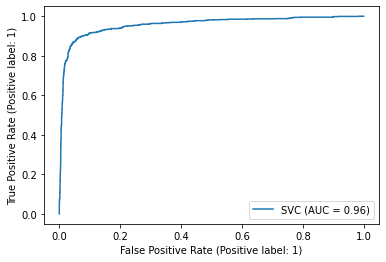

<sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x7f673f4ef610>

In [0]:
# AUC plot
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svm, X_test_transformed, y_test)

# We can also add Model in Pipeline (to make it more clean)

## Logistic Regression Pipeline

In [0]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [0]:
lr_pipeline = Pipeline(steps=[
                    ('preprocess', data_pipeline),
                    ('model', lr_model)])

In [0]:
lr_pipeline

Out[54]: Pipeline(steps=[('preprocess',
 ColumnTransformer(transformers=[('numeric',
 Pipeline(steps=[('impute',
 SimpleImputer()),
 ('scale',
 MinMaxScaler())]),
 ['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']),
 ('categorical',
 Pipeline(steps=[('cat-impute',
 SimpleImputer(strategy='most_frequent')),
 ('one-hot',
 OneHotEncoder(handle_unknown='ignore',
 sparse=False))]),
 ['department', 'salary'])])),
 ('model', LogisticRegression())])

In [0]:
from sklearn import set_config
set_config(display='diagram')

In [0]:
lr_pipeline

Out[56]:

Pipeline Pipeline(steps=[('preprocess',
 ColumnTransformer(transformers=[('numeric',
 Pipeline(steps=[('impute',
 SimpleImputer()),
 ('scale',
 MinMaxScaler())]),
 ['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']),
 ('categorical',
 Pipeline(steps=[('cat-impute',
 SimpleImputer(strategy='most_frequent')),
 ('one-hot',
 OneHotEncoder(handle_unknown='ignore',
 sparse=False))]),
 ['department', 'salary'])])),
 ('model', LogisticRegression())]) preprocess: ColumnTransformer ColumnTransformer(transformers=[('numeric',
 Pipeline(steps=[('impute', SimpleImputer()),
 ('scale', MinMaxScaler())]),
 ['satisfaction_level', 'last_evaluation',
 'number_project', 'average_montly_hours',
 'time_spend_company', 'Work_accident',
 'promotion_last_5years']),
 ('categorical',
 Pipeline(steps=[('cat-impute',
 SimpleImputer(strategy='most_frequent')),
 ('one-hot',
 OneHotEncoder(handle_unknown='ignore',
 sparse=False))]),
 ['department', 'salary'])]) numeric ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years'] SimpleImputer SimpleImputer() MinMaxScaler MinMaxScaler() categorical ['department', 'salary'] SimpleImputer SimpleImputer(strategy='most_frequent') OneHotEncoder OneHotEncoder(handle_unknown='ignore', sparse=False) LogisticRegression LogisticRegression()

In [0]:
# fit pipeline with model
lr_pipeline.fit(X_train, y_train)

Out[57]:

Pipeline Pipeline(steps=[('preprocess',
 ColumnTransformer(transformers=[('numeric',
 Pipeline(steps=[('impute',
 SimpleImputer()),
 ('scale',
 MinMaxScaler())]),
 ['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']),
 ('categorical',
 Pipeline(steps=[('cat-impute',
 SimpleImputer(strategy='most_frequent')),
 ('one-hot',
 OneHotEncoder(handle_unknown='ignore',
 sparse=False))]),
 ['department', 'salary'])])),
 ('model', LogisticRegression())]) preprocess: ColumnTransformer ColumnTransformer(transformers=[('numeric',
 Pipeline(steps=[('impute', SimpleImputer()),
 ('scale', MinMaxScaler())]),
 ['satisfaction_level', 'last_evaluation',
 'number_project', 'average_montly_hours',
 'time_spend_company', 'Work_accident',
 'promotion_last_5years']),
 ('categorical',
 Pipeline(steps=[('cat-impute',
 SimpleImputer(strategy='most_frequent')),
 ('one-hot',
 OneHotEncoder(handle_unknown='ignore',
 sparse=False))]),
 ['department', 'salary'])]) numeric ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years'] SimpleImputer SimpleImputer() MinMaxScaler MinMaxScaler() categorical ['department', 'salary'] SimpleImputer SimpleImputer(strategy='most_frequent') OneHotEncoder OneHotEncoder(handle_unknown='ignore', sparse=False) LogisticRegression LogisticRegression()

In [0]:
# predictions from pipeline
y_pred = lr_pipeline.predict(X_test)
y_pred

Out[58]: array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
# accuracy on test set using lr_pipeline
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

Out[59]: 0.7902222222222223

In [0]:
# confusion matrix from lr_pipeline
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3202 227]
 [ 717 354]]

## Support Vector Machine Pipeline

In [0]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)

In [0]:
svm_pipeline = Pipeline(steps=[
                    ('preprocess', data_pipeline),
                    ('model', svm_model)])

In [0]:
# fit pipeline with model
svm_pipeline.fit(X_train, y_train)

Out[63]:

Pipeline Pipeline(steps=[('preprocess',
 ColumnTransformer(transformers=[('numeric',
 Pipeline(steps=[('impute',
 SimpleImputer()),
 ('scale',
 MinMaxScaler())]),
 ['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']),
 ('categorical',
 Pipeline(steps=[('cat-impute',
 SimpleImputer(strategy='most_frequent')),
 ('one-hot',
 OneHotEncoder(handle_unknown='ignore',
 sparse=False))]),
 ['department', 'salary'])])),
 ('model', SVC(probability=True))]) preprocess: ColumnTransformer ColumnTransformer(transformers=[('numeric',
 Pipeline(steps=[('impute', SimpleImputer()),
 ('scale', MinMaxScaler())]),
 ['satisfaction_level', 'last_evaluation',
 'number_project', 'average_montly_hours',
 'time_spend_company', 'Work_accident',
 'promotion_last_5years']),
 ('categorical',
 Pipeline(steps=[('cat-impute',
 SimpleImputer(strategy='most_frequent')),
 ('one-hot',
 OneHotEncoder(handle_unknown='ignore',
 sparse=False))]),
 ['department', 'salary'])]) numeric ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years'] SimpleImputer SimpleImputer() MinMaxScaler MinMaxScaler() categorical ['department', 'salary'] SimpleImputer SimpleImputer(strategy='most_frequent') OneHotEncoder OneHotEncoder(handle_unknown='ignore', sparse=False) SVC SVC(probability=True)

In [0]:
# predictions from pipeline
y_pred = svm_pipeline.predict(X_test)
y_pred

Out[64]: array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
# accuracy on test set using svm_pipeline
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

Out[65]: 0.9344444444444444

In [0]:
# confusion matrix from svm_pipeline
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3292 137]
 [ 158 913]]

## Random Forest Pipeline

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [0]:
rf_pipeline = Pipeline(steps=[
                    ('preprocess', data_pipeline),
                    ('model', rf_model)])

In [0]:
# fit pipeline with model
rf_pipeline.fit(X_train, y_train)

Out[69]:

Pipeline Pipeline(steps=[('preprocess',
 ColumnTransformer(transformers=[('numeric',
 Pipeline(steps=[('impute',
 SimpleImputer()),
 ('scale',
 MinMaxScaler())]),
 ['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']),
 ('categorical',
 Pipeline(steps=[('cat-impute',
 SimpleImputer(strategy='most_frequent')),
 ('one-hot',
 OneHotEncoder(handle_unknown='ignore',
 sparse=False))]),
 ['department', 'salary'])])),
 ('model', RandomForestClassifier())]) preprocess: ColumnTransformer ColumnTransformer(transformers=[('numeric',
 Pipeline(steps=[('impute', SimpleImputer()),
 ('scale', MinMaxScaler())]),
 ['satisfaction_level', 'last_evaluation',
 'number_project', 'average_montly_hours',
 'time_spend_company', 'Work_accident',
 'promotion_last_5years']),
 ('categorical',
 Pipeline(steps=[('cat-impute',
 SimpleImputer(strategy='most_frequent')),
 ('one-hot',
 OneHotEncoder(handle_unknown='ignore',
 sparse=False))]),
 ['department', 'salary'])]) numeric ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years'] SimpleImputer SimpleImputer() MinMaxScaler MinMaxScaler() categorical ['department', 'salary'] SimpleImputer SimpleImputer(strategy='most_frequent') OneHotEncoder OneHotEncoder(handle_unknown='ignore', sparse=False) RandomForestClassifier RandomForestClassifier()

In [0]:
# predictions from pipeline
y_pred = rf_pipeline.predict(X_test)
y_pred

Out[70]: array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
# accuracy on test set using rf_pipeline
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

Out[71]: 0.9886666666666667

In [0]:
# confusion matrix from rf_pipeline
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3411 18]
 [ 33 1038]]

## K Nearest Neighbour Pipeline

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [0]:
knn_pipeline = Pipeline(steps=[
                    ('preprocess', data_pipeline),
                    ('model', knn_model)])

In [0]:
# fit pipeline with model
knn_pipeline.fit(X_train, y_train)

Out[75]:

Pipeline Pipeline(steps=[('preprocess',
 ColumnTransformer(transformers=[('numeric',
 Pipeline(steps=[('impute',
 SimpleImputer()),
 ('scale',
 MinMaxScaler())]),
 ['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']),
 ('categorical',
 Pipeline(steps=[('cat-impute',
 SimpleImputer(strategy='most_frequent')),
 ('one-hot',
 OneHotEncoder(handle_unknown='ignore',
 sparse=False))]),
 ['department', 'salary'])])),
 ('model', KNeighborsClassifier())]) preprocess: ColumnTransformer ColumnTransformer(transformers=[('numeric',
 Pipeline(steps=[('impute', SimpleImputer()),
 ('scale', MinMaxScaler())]),
 ['satisfaction_level', 'last_evaluation',
 'number_project', 'average_montly_hours',
 'time_spend_company', 'Work_accident',
 'promotion_last_5years']),
 ('categorical',
 Pipeline(steps=[('cat-impute',
 SimpleImputer(strategy='most_frequent')),
 ('one-hot',
 OneHotEncoder(handle_unknown='ignore',
 sparse=False))]),
 ['department', 'salary'])]) numeric ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years'] SimpleImputer SimpleImputer() MinMaxScaler MinMaxScaler() categorical ['department', 'salary'] SimpleImputer SimpleImputer(strategy='most_frequent') OneHotEncoder OneHotEncoder(handle_unknown='ignore', sparse=False) KNeighborsClassifier KNeighborsClassifier()

In [0]:
# predictions from pipeline
y_pred = knn_pipeline.predict(X_test)
y_pred

Out[76]: array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [0]:
# accuracy on test set using knn_pipeline
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

Out[77]: 0.9366666666666666

In [0]:
# confusion matrix from knn_pipeline
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3268 161]
 [ 124 947]]

# Save Sklearn Model / Pipeline

In [0]:
from joblib import dump
dump(knn_pipeline, 'knn_pipeline_sklearn.pkl') 

Out[79]: ['knn_pipeline_sklearn.pkl']

# Load Sklearn Model / Pipeline

In [0]:
from joblib import load
loaded_knn_pipeline = load('knn_pipeline_sklearn.pkl') 

In [0]:
loaded_knn_pipeline

Out[81]:

Pipeline Pipeline(steps=[('preprocess',
 ColumnTransformer(transformers=[('numeric',
 Pipeline(steps=[('impute',
 SimpleImputer()),
 ('scale',
 MinMaxScaler())]),
 ['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']),
 ('categorical',
 Pipeline(steps=[('cat-impute',
 SimpleImputer(strategy='most_frequent')),
 ('one-hot',
 OneHotEncoder(handle_unknown='ignore',
 sparse=False))]),
 ['department', 'salary'])])),
 ('model', KNeighborsClassifier())]) preprocess: ColumnTransformer ColumnTransformer(transformers=[('numeric',
 Pipeline(steps=[('impute', SimpleImputer()),
 ('scale', MinMaxScaler())]),
 ['satisfaction_level', 'last_evaluation',
 'number_project', 'average_montly_hours',
 'time_spend_company', 'Work_accident',
 'promotion_last_5years']),
 ('categorical',
 Pipeline(steps=[('cat-impute',
 SimpleImputer(strategy='most_frequent')),
 ('one-hot',
 OneHotEncoder(handle_unknown='ignore',
 sparse=False))]),
 ['department', 'salary'])]) numeric ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years'] SimpleImputer SimpleImputer() MinMaxScaler MinMaxScaler() categorical ['department', 'salary'] SimpleImputer SimpleImputer(strategy='most_frequent') OneHotEncoder OneHotEncoder(handle_unknown='ignore', sparse=False) KNeighborsClassifier KNeighborsClassifier()

In [0]:
loaded_knn_pipeline.predict_proba(X_test)

Out[84]: array([[1. , 0. ],
 [1. , 0. ],
 [1. , 0. ],
 ...,
 [1. , 0. ],
 [1. , 0. ],
 [0.2, 0.8]])

In [0]:
!ls

conf eventlogs ganglia knn_pipeline_sklearn.pkl logs preload_class.lst